In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv('thesis dataset copy - Sheet1 (2).csv')
df=df.drop(columns=["Date"])
columns_to_one_hot_encode=[
    'Chemical Name', 'Chemical Nature','Supplier Country','Storing Container','Supplier Company','Composition','Usage'
]

one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_columns = one_hot_encoder.fit_transform(df[columns_to_one_hot_encode])
encoded_df = pd.DataFrame(encoded_columns, columns=one_hot_encoder.get_feature_names_out(columns_to_one_hot_encode))
df = df.drop(columns=columns_to_one_hot_encode)
df=pd.concat([df,encoded_df],axis=1)

label_encoder = LabelEncoder()
df['Quality'] = label_encoder.fit_transform(df['Quality'])

pd=pd.DataFrame(df)

df.fillna(df.mean(), inplace=True)
X = df.drop(columns=['Quality'])
y = df['Quality']
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



roc auc test


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4719, number of negative: 2729
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 258
[LightGBM] [Info] Number of data points in the train set: 7448, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633593 -> initscore=0.547662
[LightGBM] [Info] Start training from score 0.547662


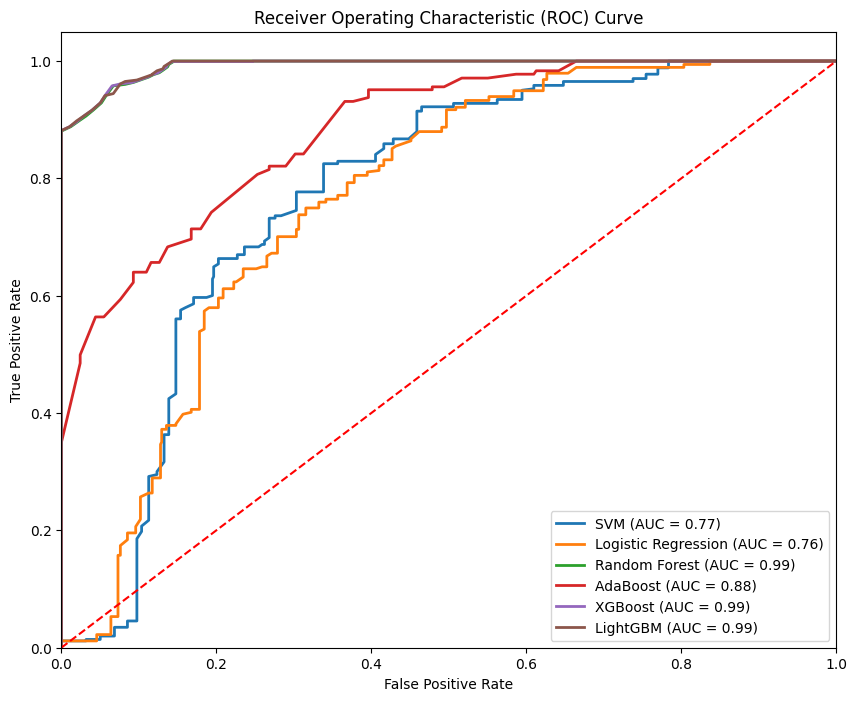

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt



# Initialize the classifiers
classifiers = {
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(random_state=42)
}

# Train the classifiers and plot the ROC curves
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_prob = clf.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot random classifier line
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

only random forest ROC AUC curve


In [ ]:
# import numpy as np
# from collections import Counter
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt

# # Define the classes for Node and DecisionTree as provided in the previous code snippet
# ##############################################
# class RandomForest:
#     def __init__(self, n_trees=10, max_depth=20, min_samples_split=2, n_features=5):
#         self.n_trees = n_trees
#         self.max_depth = max_depth
#         self.min_samples_split = min_samples_split
#         self.n_features = n_features
#         self.trees = []

#     def fit(self, X, y):
#         self.trees = []
#         for _ in range(self.n_trees):
#             tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split, n_features=self.n_features)
#             X_sample, y_sample = self._bootstrap_samples(X, y)
#             tree.fit(X_sample, y_sample)
#             self.trees.append(tree)

#     def _bootstrap_samples(self, X, y):
#         n_samples = X.shape[0]
#         idxs = np.random.choice(n_samples, n_samples, replace=True)
#         return X[idxs], y[idxs]

#     def predict(self, X):
#         tree_preds = np.array([tree.predict(X) for tree in self.trees])
#         tree_preds = np.swapaxes(tree_preds, 0, 1)
#         y_pred = [self._most_common_label(tree_pred) for tree_pred in tree_preds]
#         return np.array(y_pred)

#     def _most_common_label(self, y):
#         if len(y) == 0:
#             return None
#         counter = Counter(y)
#         value = counter.most_common(1)[0][0]
#         return value
# ####################################





# # Assuming x_train, x_test, y_train, y_test are defined earlier
# # Convert data to correct type
# x_train = np.array(x_train, dtype=float)
# x_test = np.array(x_test, dtype=float)
# y_train = np.array(y_train, dtype=int)
# y_test = np.array(y_test, dtype=int)
# # Train the Random Forest classifier
# clf = RandomForest()
# clf.fit(x_train, y_train)

# # Compute predicted labels
# y_pred = clf.predict(x_test)

# # Calculate predicted probabilities for the positive class
# # In a binary classification problem, positive class is usually represented by class 1
# # Therefore, we need to convert predicted labels to probabilities for class 1
# y_prob = y_pred  # Since the predicted labels are already 0 or 1

# # Calculate ROC curve and AUC score
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# roc_auc = roc_auc_score(y_test, y_prob)

# # Plot ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# #plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()



[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0,

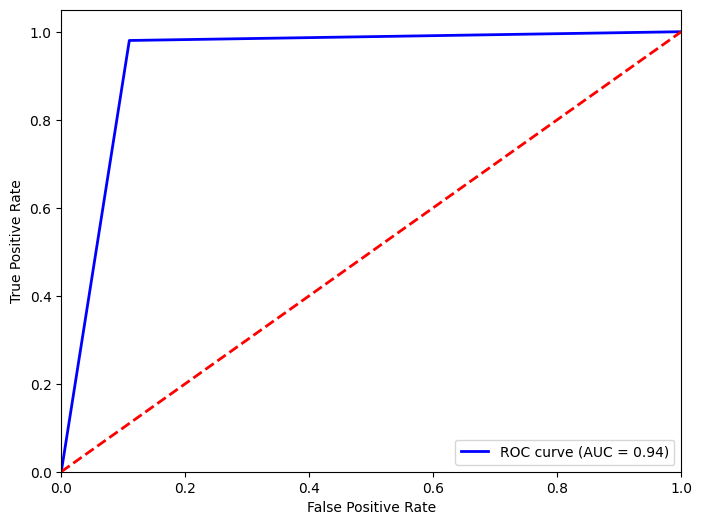

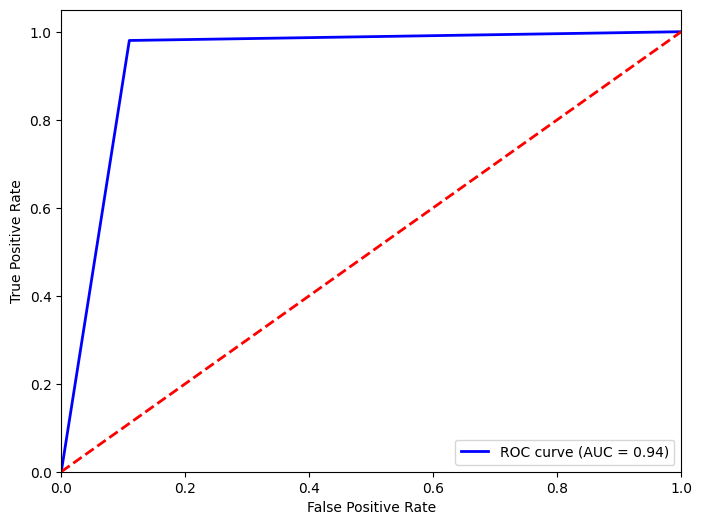

In [ ]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt



# import numpy as np
# from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=5):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        #feat_idxs = np.random.choice(n_feats, self.n_features, replace=False) original
        best_feature, best_thresh = self._best_split(X, y, range(n_feats))
        #best_feature, best_thresh = self._best_split(X, y, feat_idxs) original

        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feature, best_thresh, left, right)

    # def _best_split(self, X, y, feat_idxs):
    #     best_gain = -1
    #     split_idx, split_threshold = None, None

    #     for feat_idx in feat_idxs:
    #         X_column = X[:, feat_idx]
    #         thresholds = np.unique(X_column)

    #         for thr in thresholds:
    #             gain = self._information_gain(y, X_column, thr)

    #             if gain > best_gain:
    #                 best_gain = gain
    #                 split_idx = feat_idx
    #                 split_threshold = thr

        #return split_idx, split_threshold
    # def _best_split(self, X, y, feat_idxs, n_bins=10):
    #     best_gain = -1
    #     split_idx, split_threshold = None, None

    #     for feat_idx in feat_idxs:
    #      X_column = X[:, feat_idx]
    #      hist, bin_edges = np.histogram(X_column, bins=n_bins)

    #     for bin_idx in range(1, len(bin_edges) - 1):
    #         thr = bin_edges[bin_idx]
    #         gain = self._information_gain(y, X_column, thr)

    #         if gain > best_gain:
    #             best_gain = gain
    #             split_idx = feat_idx
    #             split_threshold = thr

    #     return split_idx, split_threshold
    #### this is a modification . keep it for explanation####
    def _best_split(self, X, y, feat_idxs, n_quantiles=10):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
         X_column = X[:, feat_idx]
         quantiles = np.linspace(0, 100, n_quantiles + 2)[1:-1]
         thresholds = np.percentile(X_column, quantiles)

         for thr in thresholds:
            gain = self._information_gain(y, X_column, thr)

            if gain > best_gain:
                best_gain = gain
                split_idx = feat_idx
                split_threshold = thr

        return split_idx, split_threshold
###########################################




    # def _best_split(self, X, y, feat_idxs):
    #      best_gain = -1
    #      split_idx, split_threshold = None, None

    #      # Calculate feature importance scores (e.g., using Gini importance)
    #      feature_importance_scores = calculate_feature_importance(X, y)

    # # Calculate weights based on feature importance scores
    #      feature_weights = feature_importance_scores / np.sum(feature_importance_scores)

    # # Sample features with replacement using weighted probabilities
    #      sampled_feat_idxs = np.random.choice(feat_idxs, size=self.n_features, replace=True, p=feature_weights)

    #      for feat_idx in sampled_feat_idxs:
    #       X_column = X[:, feat_idx]
    #       thresholds = np.unique(X_column)

    #      for thr in thresholds:
    #         gain = self._information_gain(y, X_column, thr)

    #         if gain > best_gain:
    #             best_gain = gain
    #             split_idx = feat_idx
    #             split_threshold = thr

    #      return split_idx, split_threshold

    ################################
    # def _gini_impurity(self, y):
    #     hist = np.bincount(y)
    #     probabilities = hist / len(y)
    #     impurity = 1 - np.sum(probabilities ** 2)
    #     return impurity
    # def _information_gain(self, y, X_column, threshold):
    #     parent_impurity = self._gini_impurity(y)
    #     left_idxs, right_idxs = self._split(X_column, threshold)

    #     if len(left_idxs) == 0 or len(right_idxs) == 0:
    #         return 0

    #     n = len(y)
    #     n_l, n_r = len(left_idxs), len(right_idxs)
    #     impurity_l, impurity_r = self._gini_impurity(y[left_idxs]), self._gini_impurity(y[right_idxs])
    #     child_impurity = (n_l / n) * impurity_l + (n_r / n) * impurity_r

    #     information_gain = parent_impurity - child_impurity
    #     return information_gain


    ################################ original
    def _information_gain(self, y, X_column, threshold):
        parent_entropy = self._entropy(y)

        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        information_gain = parent_entropy - child_entropy
        return information_gain
################################################# original


    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs


    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        if len(y) == 0:
            return None
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

class RandomForest:
    def __init__(self, n_trees=10, max_depth=20, min_samples_split=2, n_features=5):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.trees = []


    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split, n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    # def _bootstrap_samples(self, X, y):
    #     n_samples = X.shape[0]
    #     idxs = np.random.choice(n_samples, n_samples, replace=True)
    #     return X[idxs], y[idxs]
    ############################



    def _bootstrap_samples(self, X, y, n_splits=5):
      n_samples = X.shape[0]

    # Use StratifiedShuffleSplit to create stratified splits
      sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.8, random_state=42)

    # Get the indices for the splits
      for train_index, _ in sss.split(X, y):
         sample_indices = train_index

    # Sample the data using the obtained indices
      return X[sample_indices], y[sample_indices]










#################################

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [np.mean(tree_pred) for tree_pred in tree_preds]
        print(y_pred)
        return np.array(y_pred)

    def _most_common_label(self, y):
        if len(y) == 0:
            return None
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)


# # Apply PCA
# pca = PCA(n_components=2)
# x_train_pca = pca.fit_transform(x_train)
# x_test_pca = pca.transform(x_test)

# # Split the data into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Convert data to correct type
x_train = np.array(x_train, dtype=float)
x_test = np.array(x_test, dtype=float)
y_train = np.array(y_train, dtype=int)
y_test = np.array(y_test, dtype=int)

# Train and test the Random Forest classifier
clf = RandomForest()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

# #print("Random Forest classification accuracy: ", accuracy(y_test, predictions))
# print(classification_report(y_test, predictions))


# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



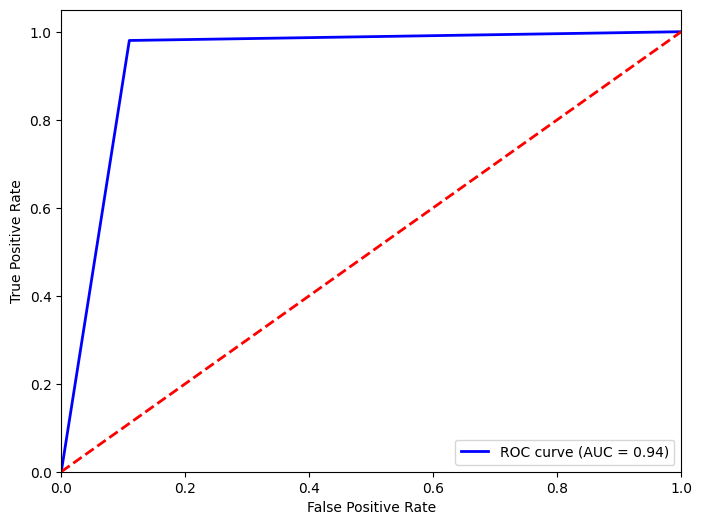

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Save the plot as a PNG with high DPI
plt.savefig("roc_curve.png", format="png", dpi=300, bbox_inches='tight')


xgboost

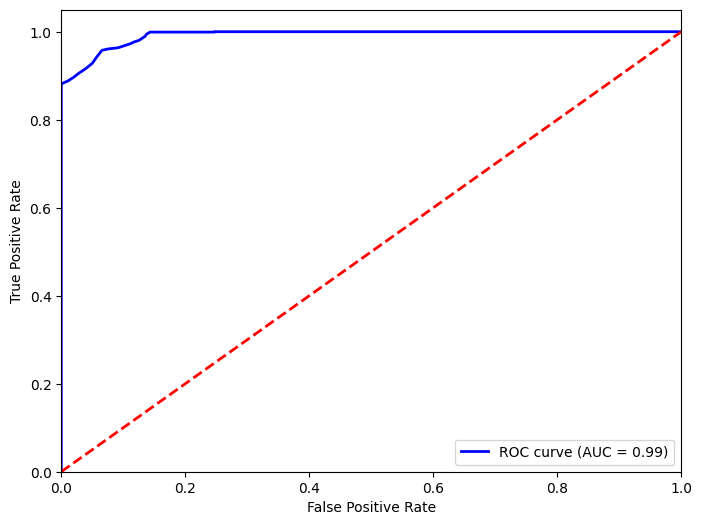

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming x_train, x_test, y_train, y_test are defined earlier
# Convert data to correct type
x_train = np.array(x_train, dtype=float)
x_test = np.array(x_test, dtype=float)
y_train = np.array(y_train, dtype=int)
y_test = np.array(y_test, dtype=int)

# Train XGBoost classifier
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Compute predicted probabilities for the positive class
y_prob = model.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


logistic regression

In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt

# # Assuming x_train, x_test, y_train, y_test are defined earlier
# # Convert data to correct type
# x_train = np.array(x_train, dtype=float)
# x_test = np.array(x_test, dtype=float)
# y_train = np.array(y_train, dtype=int)
# y_test = np.array(y_test, dtype=int)

# # Train Logistic Regression classifier
# model = LogisticRegression()
# model.fit(x_train, y_train)

# # Compute predicted probabilities for the positive class
# y_prob = model.predict_proba(x_test)[:, 1]

# # Calculate ROC curve and AUC score
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# roc_auc = roc_auc_score(y_test, y_prob)

# # Plot ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# #plt.title('ROC Curve ')
# plt.legend(loc='lower right')
# plt.show()
